In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
from os.path import expanduser

sys.path.append("{0}/repos/polso/strava/".format(expanduser("~")))

import pandas as pd
import datetime

from IPython.display import Markdown

from strava_dash import StravaScraper


In [2]:
YD_2_MILES = 0.0006

In [3]:
def filter_pbear(training):
    training.swims = training.swims.query("temperature <= 56")
    training.total_yards = int(training.swims.distance.sum())
    return training

In [4]:
%%capture
training = StravaScraper()
training.get_swims(after='2020-12-21', before='2021-03-21')
training = filter_pbear(training)

2021-01-18 18:33:59.286 | INFO     | stravaio:strava_oauth2:343 - serving at port 8000
2021-01-18 18:34:02.217 | DEBUG    | stravaio:run_server_and_wait_for_token:397 - code: 961aa6dcf7036ad9301810007686bad56fae577f
2021-01-18 18:34:07.669 | DEBUG    | stravaio:run_server_and_wait_for_token:406 - Authorized athlete: 33eb5f1107488e88250d8b4e5fbb69389623c844


# Distance

In [5]:
from IPython.display import Markdown

Markdown("""
##### Total Miles: {0} 
""".format(training.total_yards * YD_2_MILES))


##### Total Miles: 28.243199999999998 


# Time

In [6]:
Markdown("""
##### Total Hours: {0} 
""".format(training.swims.hours.sum()))


##### Total Hours: 19.730277777777783 


In [7]:
training.swims[['name', 'temperature', 'elapsed_time', 'average_speed']]

,name,temperature,elapsed_time,average_speed
start_date,,,,
2021-01-17 07:58:06-08:00,Not Coughlan,51.8,01:25:26,0.724
2021-01-16 07:44:56-08:00,Last famous words: that flood aint shit...,51.8,04:03:56,0.481
2021-01-14 06:30:32-08:00,Nice and foggy...,51.8,01:45:11,0.728
2021-01-13 06:50:04-08:00,Talk less... swim more...,51.8,01:09:59,0.845
2021-01-11 06:56:59-08:00,Bump...,51.8,00:59:53,0.782
2021-01-09 08:07:06-08:00,In the (Sea)Lion den...,51.8,03:03:55,0.670
2021-01-08 06:50:57-08:00,Pink lantern,51.8,00:52:28,0.624
2021-01-06 06:27:43-08:00,GPS is kinda dodgy....,51.8,00:47:45,0.954
2021-01-04 06:33:25-08:00,Dark and rainy ebb,51.8,00:41:25,0.607


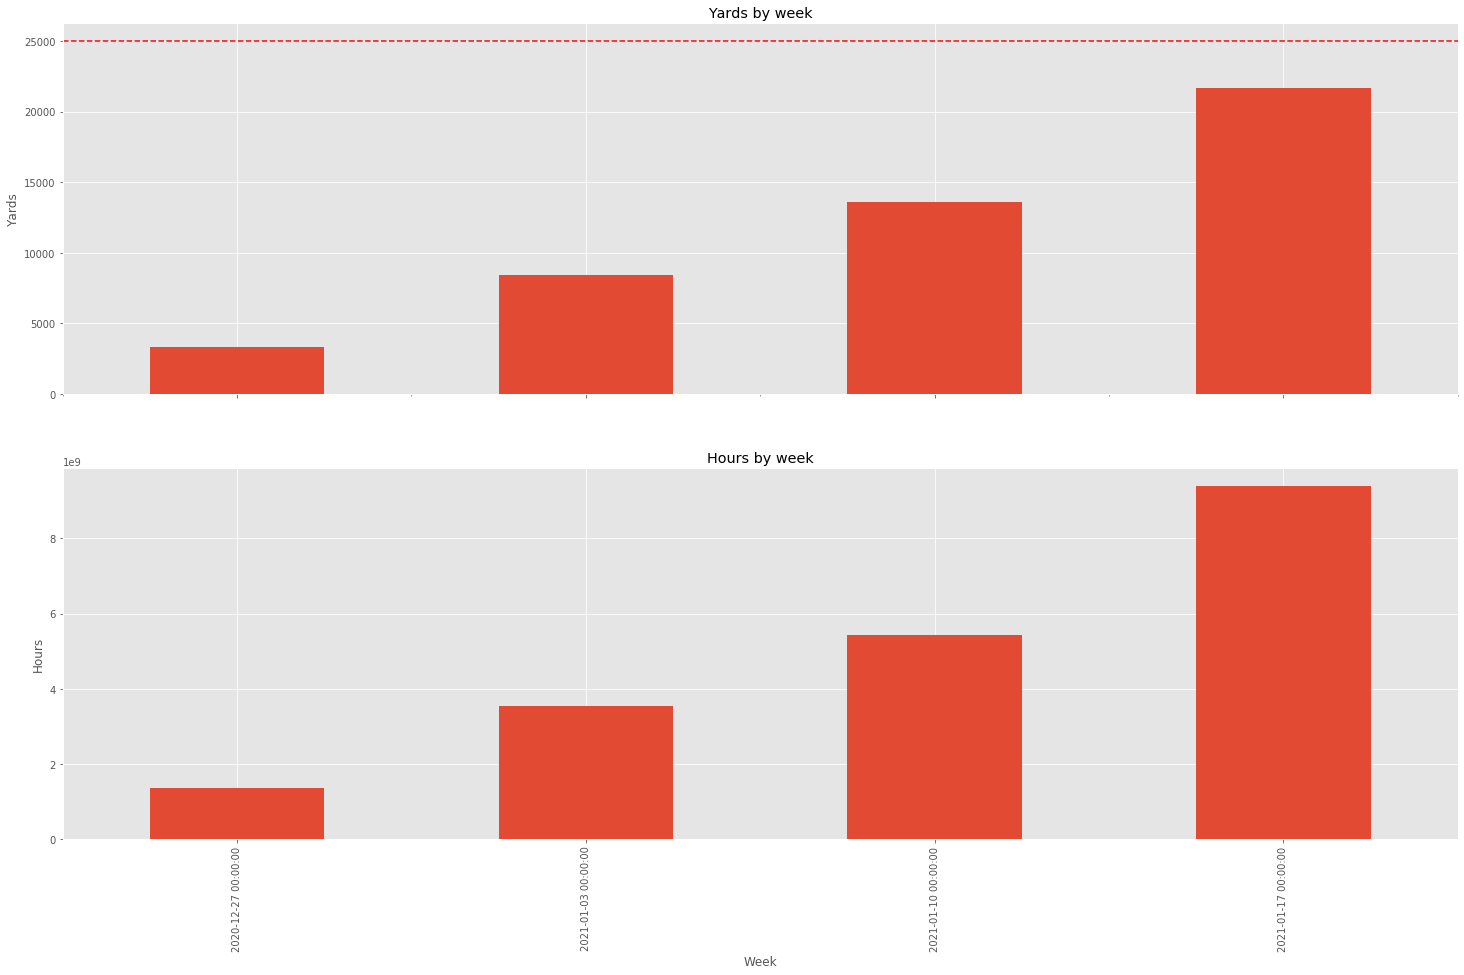

In [14]:
tmp = training.plot_summary(yardage_goal=25000)
